# Model Evaluation

- Goal has been to predict the **response value** of an **unknown observation**
    - predict the species of an unknown iris
- Made predictions using KNN models with **different values of K**
- Need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**Solution:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

**Note:** These procedures can be used with **any machine learning model**, not only KNN.

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [3]:
# read the NBA data into a DataFrame
import pandas as pd
url = 'https://query.data.world/s/74pdlrcjkdvgij67ped5htqwjabayo'
nba = pd.read_csv(url, index_col=0)

In [11]:
nba.columns

Index(['Pos', 'Age', 'Team', 'Games', 'Starts', 'Mins', 'MinPerGame', 'FGMade',
       'FGAttempt', 'FGPct', 'FG3Made', 'FG3Attempt', 'FG3Pct', 'FTMade',
       'FTAttempt', 'FTPct', 'OffRebound', 'DefRebound', 'Rebounds', 'Assists',
       'Steals', 'Blocks', 'Turnovers', 'Fouls', 'Points'],
      dtype='object')

In [7]:
# create feature matrix (X)
feature_cols = ['Assists', 'Steals', 'Blocks', 'Turnovers', 'Points']
X = nba[feature_cols]

In [16]:
# map positions to numbers
pos_num = {'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5}
nba['Pos_Num']= [pos_num[pos] for pos in nba.Pos]

In [21]:
# create response vector (y)
y = nba.Pos

### KNN (K=50)

In [22]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=50)

# train the model on the entire dataset
knn.fit(X, y)

# predict the response values for the observations in X ("test the model")
knn.predict(X)

array(['PF', 'SG', 'PF', 'PF', 'SG', 'SG', 'SG', 'SG', 'SG', 'PG', 'SG',
       'SG', 'PF', 'PG', 'SG', 'PG', 'PG', 'SG', 'SG', 'SG', 'SG', 'PF',
       'PG', 'PG', 'SG', 'PG', 'SG', 'SG', 'PG', 'PG', 'PF', 'SG', 'PF',
       'PG', 'PG', 'PG', 'PF', 'SG', 'SF', 'SG', 'PG', 'PF', 'SF', 'SG',
       'PG', 'PF', 'PG', 'SG', 'SG', 'PF', 'PF', 'SG', 'PG', 'PG', 'SG',
       'SG', 'PF', 'PG', 'PF', 'PF', 'PF', 'PF', 'PF', 'PF', 'PF', 'SF',
       'SF', 'SG', 'PG', 'SG', 'PF', 'SG', 'PG', 'SG', 'PF', 'SG', 'PF',
       'PF', 'PG', 'SG', 'PF', 'PG', 'PG', 'SG', 'PF', 'SG', 'PG', 'PG',
       'PG', 'PG', 'PG', 'SG', 'PG', 'PF', 'SG', 'PF', 'SG', 'SG', 'SG',
       'SG', 'PG', 'SG', 'PG', 'PG', 'PG', 'SG', 'SG', 'PG', 'PG', 'SG',
       'C', 'SG', 'PG', 'PF', 'SG', 'SG', 'SF', 'PF', 'SG', 'SG', 'SG',
       'SG', 'SG', 'SG', 'SG', 'SG', 'PF', 'PG', 'PF', 'SG', 'PF', 'SG',
       'PG', 'SG', 'SG', 'PG', 'PG', 'SG', 'SG', 'SG', 'SG', 'SG', 'PG',
       'SG', 'SG', 'PG', 'PF', 'PG', 'SG', 'SG', 'PG

In [23]:
# store the predicted response values
y_pred_class = knn.predict(X)

To evaluate a model, we also need an **evaluation metric:**

- Numeric calculation used to **quantify** the performance of a model
- Appropriate metric depends on the **goals** of your problem

Most common choices for classification problems:

- **Classification accuracy**: percentage of correct predictions ("reward function" since higher is better)
- **Classification error**: percentage of incorrect predictions ("loss function" since lower is better)

In this case, we'll use classification accuracy.

In [25]:
# compute classification accuracy
from sklearn import metrics
print (metrics.accuracy_score(y, y_pred_class))

0.4065934065934066


This is known as **training accuracy** because we are evaluating the model on the same data we used to train the model.

### KNN (K=1)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred_class = knn.predict(X)
print (metrics.accuracy_score(y, y_pred_class))

1.0


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data:
    - Will do well when tested using the in-sample data
    - May do poorly on out-of-sample data
    - Learns the "noise" in the data rather than the "signal"
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

**Thus, training accuracy is not a good estimate of out-of-sample accuracy.**

![1NN classification map](../../../img/iris_01nn_map.png)

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

What does this accomplish?

- Model can be trained and tested on **different data** (we treat testing data like out-of-sample data).
- Response values are known for the testing set, and thus **predictions can be evaluated**.

This is known as **testing accuracy** because we are evaluating the model on an independent "test set" that was not used during model training.

**Testing accuracy is a better estimate of out-of-sample performance than training accuracy.**

### Understanding "unpacking"

In [28]:
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    return [smallest, largest]

In [30]:
min_and_max = min_max([1, 2, 3])
print (min_and_max)
print (type(min_and_max))

[1, 3]
<class 'list'>


In [32]:
the_min, the_max = min_max([1, 2, 3])
print (the_min)
print (type(the_min))
print (the_max)
print (type(the_max))

1
<class 'int'>
3
<class 'int'>


### Understanding the `train_test_split` function

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
# before splitting
print (X.shape)

# after splitting
print (X_train.shape)
print (X_test.shape)

(182, 5)
(136, 5)
(46, 5)


In [38]:
# before splitting
print (y.shape)

# after splitting
print (y_train.shape)
print (y_test.shape)

(182,)
(136,)
(46,)


![train_test_split](../../../img/train_test_split.png)

### Understanding the `random_state` parameter

In [39]:
# WITHOUT a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y)

# print the first element of each object
print (X_train.head(1))
print (X_test.head(1))
print (y_train.head(1))
print (y_test.head(1))

             Assists  Steals  Blocks  Turnovers  Points
Player                                                 
Joakim Noah      312      48      74        123     485
              Assists  Steals  Blocks  Turnovers  Points
Player                                                  
Ben McLemore      140      77      19        138     996
Player
Joakim Noah    C
Name: Pos, dtype: object
Player
Ben McLemore    SG
Name: Pos, dtype: object


In [41]:
# WITH a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# print the first element of each object
print (X_train.head(1))
print (X_test.head(1))
print (y_train.head(1))
print (y_test.head(1))

             Assists  Steals  Blocks  Turnovers  Points
Player                                                 
Tony Parker      335      44       2        146     976
              Assists  Steals  Blocks  Turnovers  Points
Player                                                  
Solomon Hill      184      66      18        115     729
Player
Tony Parker    PG
Name: Pos, dtype: object
Player
Solomon Hill    SF
Name: Pos, dtype: object


### Using the train/test split procedure (K=1)

In [42]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [43]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.4782608695652174


### Repeating for K=50

In [45]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.32608695652173914


![Bias-variance tradeoff](../../../img/bias_variance.png)

### Comparing testing accuracy with null accuracy

Null accuracy is the accuracy that could be achieved by **always predicting the most frequent class**. It is a benchmark against which you may want to measure your classification model.

In [46]:
# examine the class distribution
y_test.value_counts()

SG    12
PG    11
C     10
PF     8
SF     5
Name: Pos, dtype: int64

In [47]:
# compute null accuracy
y_test.value_counts().head(1) / len(y_test)

SG    0.26087
Name: Pos, dtype: float64

### Searching for the "best" value of K

In [48]:
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 100

k_range = range(1, 101)
training_error = []
testing_error = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X, y)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [49]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [50]:
# create a DataFrame of K, training error, and testing error
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
100,0.620879,0.652174
99,0.626374,0.652174
98,0.631868,0.608696
97,0.626374,0.630435
96,0.626374,0.586957


Text(0, 0.5, 'Error (lower is better)')

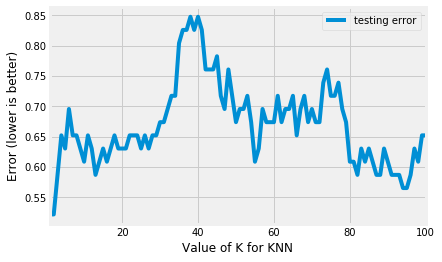

In [51]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
df.plot(y='testing error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

In [56]:
# find the minimum testing error and the associated K value
df.sort_values(by=['testing error']).head()

,training error,testing error
K,,
1,0.000000,0.521739
2,0.291209,0.521739
95,0.631868,0.565217
94,0.637363,0.565217
96,0.626374,0.586957


In [57]:
# alternative method
min(zip(testing_error, k_range))

(0.5217391304347826, 1)

What could we conclude?

- When using KNN on this dataset with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

### Training error versus testing error

Text(0, 0.5, 'Error (lower is better)')

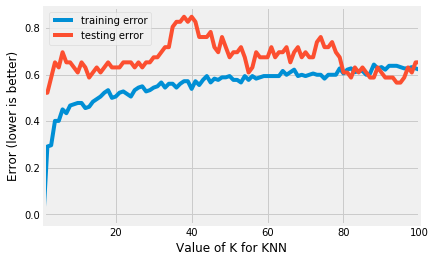

In [58]:
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

![Bias-variance tradeoff](../../../img/training_testing_error.png)

## Making predictions on out-of-sample data

Given the statistics of a (truly) unknown player, how do we predict his position?

In [60]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=14)

# re-train the model with X and y (not X_train and y_train) - why?
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[1, 1, 0, 1, 2]])

array(['SF'], dtype=object)

## Disadvantages of train/test split?

What would happen if the `train_test_split` function had split the data differently? Would we get the same exact results as before?

In [62]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=98)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.2391304347826087


- Testing accuracy is a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its **flexibility and speed**